In [2]:
import pandas as pd

sample_info = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/My Drive/ROSMAP_Data/RNAseq_RISK_BrainRegions_STasaki/data/sample_info.tsv", sep="\t")
pheno_df = pd.read_excel("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/My Drive/ROSMAP_Data/MetaData/files/dataset_1593_cross-sectional_08-13-2025.xlsx")


/opt/anaconda3/envs/new_base/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
pheno_df.columns

Index(['projid', 'study', 'scaled_to', 'apoe_genotype', 'age_first_ad_dx',
       'cogdx', 'age_bl', 'age_death', 'died', 'educ', 'marital_now_bl',
       'msex', 'race7', 'spanish', 'alcohol_g_bl', 'ldai_bl', 'smoking_bl',
       'cancer_bl', 'headinjrloc_bl', 'med_con_sum_bl', 'thyroid_bl',
       'a_score_st4', 'ad_adnc', 'adnc', 'b_score', 'braaksc', 'c_score',
       'ceradsc', 'gpath', 'pmi', 'amylsqrt_est_8reg', 'hip_scl_yn_mid',
       'lewydx_st4', 'tangsqrt_est_8reg', 'tdp_st4', 'arteriol_scler',
       'caa_4gp', 'cvda_4gp2', 'ci_num2_gct', 'ci_num2_mct', 'early_hh_ses',
       'income_bl'],
      dtype='object')

In [4]:
sample_info.columns

Index(['IID', 'FID', 'SAMPLE.ID', 'RegionName', 'Batch', 'TOTAL_READS',
       'PF_READS', 'PCT_PF_READS', 'PF_NOISE_READS', 'PF_READS_ALIGNED',
       ...
       'Center', 'DateSampleExtracted', 'msex', 'cnt.ratio.mRNA',
       'mt.ratio.mRNA', 'cnt.ratio.premRNA', 'mt.ratio.premRNA', 'Project',
       'Projid', 'pmi'],
      dtype='object', length=120)

In [8]:
samples_by_phenotype = pd.merge(sample_info, pheno_df, left_on="IID", right_on="projid", how="left")

In [9]:
samples_by_phenotype = samples_by_phenotype[["IID", "FID", "RegionName", "Batch", "projid", "cogdx", "SAMPLE.ID"]]

In [17]:
# Count distinct IID that have 3 or more samples and are not missing in the projid column
have_proj_id = samples_by_phenotype['projid'].notnull()
projid_1_5 = have_proj_id & (samples_by_phenotype['cogdx'].isin([1, 2, 3, 4, 5]))
distinct_iid_count = samples_by_phenotype[projid_1_5]['IID'].value_counts()
filtered_iid3 = distinct_iid_count[distinct_iid_count >= 3]

In [18]:
filtered_iid3

IID
246264      3
38131115    3
37178462    3
37251992    3
37393077    3
           ..
10557081    3
20537160    3
10551157    3
20506587    3
20559562    3
Name: count, Length: 450, dtype: int64

In [11]:
# Count distinct IID that have 3 or more samples
distinct_iid_count = samples_by_phenotype['IID'].value_counts()
filtered_iid = distinct_iid_count[distinct_iid_count >= 3]

In [12]:
filtered_iid

IID
246264      3
39125441    3
37393077    3
37436329    3
37439930    3
           ..
20611993    3
20569910    3
10551157    3
20561642    3
9391376     3
Name: count, Length: 464, dtype: int64

In [13]:
# Count distinct IID that have 3 or more samples and are not missing in the projid column
filtered_iid2 = filtered_iid[filtered_iid.index.notnull()]

In [14]:
filtered_iid2

IID
246264      3
39125441    3
37393077    3
37436329    3
37439930    3
           ..
20611993    3
20569910    3
10551157    3
20561642    3
9391376     3
Name: count, Length: 464, dtype: int64

Visualizations of Modules from ROSMAP

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/2323586878.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)


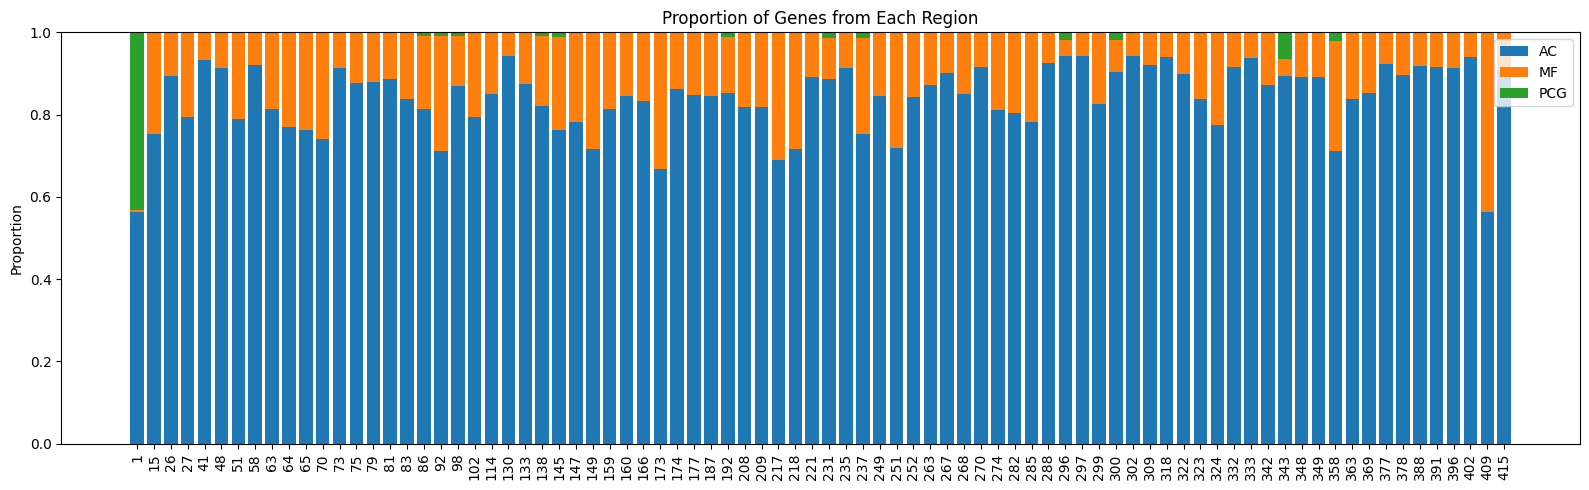

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go

cluster_details_full = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv", sep="\t")

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']

clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]]

for c in ["AC", "MF", "PCG"]:
    clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]]
props = counts.div(counts.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
props.insert(0, 'Cluster ID', clusters['Cluster ID'].astype(int).values)

fig, ax = plt.subplots(figsize=(16,5))
x = np.arange(len(props))
ax.bar(x, props['AC'], label='AC')
ax.bar(x, props['MF'], bottom=props['AC'], label='MF')
ax.bar(x, props['PCG'], bottom=props["AC"] + props["MF"], label='PCG')
ax.set_xticks(x)
ax.set_xticklabels(props['Cluster ID'].astype(str).tolist(), rotation=90)   
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Genes from Each Region')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig("rosmap_gene_proportions.png", dpi=220, bbox_inches='tight')
plt.show()

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/525028718.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)


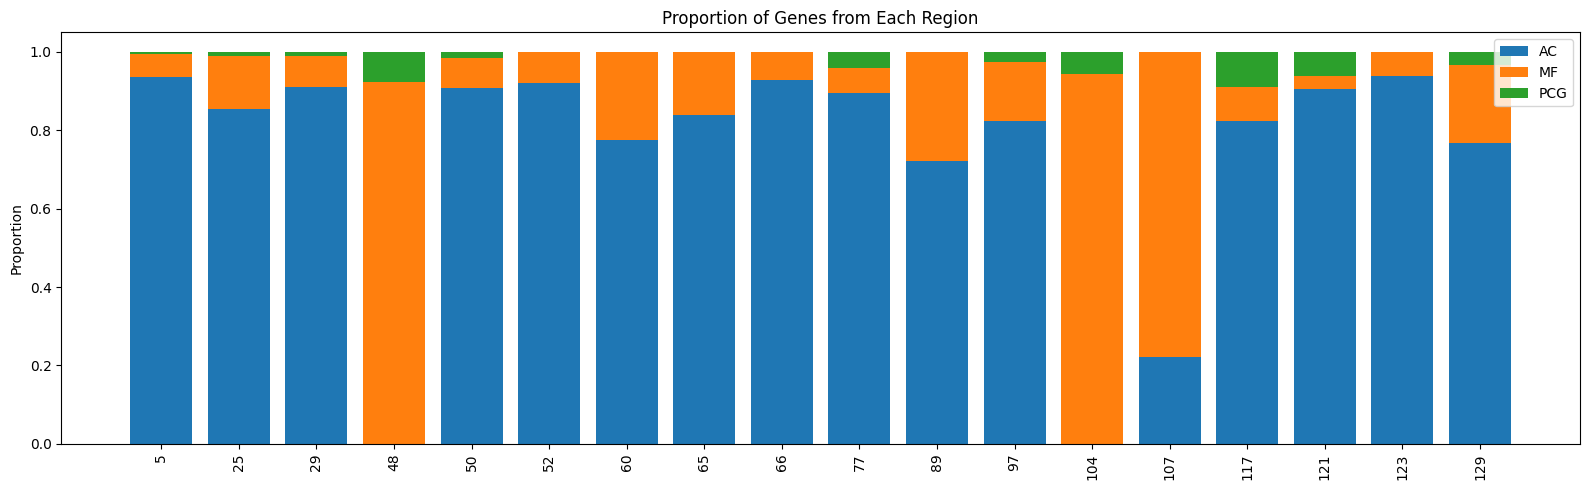

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go

cluster_details_full = pd.read_csv("/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv", sep="\t")

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']

clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]]

for c in ["AC", "MF", "PCG"]:
    clusters[c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]]
props = counts.div(counts.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)
props.insert(0, 'Cluster ID', clusters['Cluster ID'].astype(int).values)

fig, ax = plt.subplots(figsize=(16,5))
x = np.arange(len(props))
ax.bar(x, props['AC'], label='AC')
ax.bar(x, props['MF'], bottom=props['AC'], label='MF')
ax.bar(x, props['PCG'], bottom=props["AC"] + props["MF"], label='PCG')
ax.set_xticks(x)
ax.set_xticklabels(props['Cluster ID'].astype(str).tolist(), rotation=90)   
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Genes from Each Region')
ax.legend(loc='upper right')
fig.tight_layout()
fig.savefig("rosmap_gene_top5000_proportions.png", dpi=220, bbox_inches='tight')
plt.show()

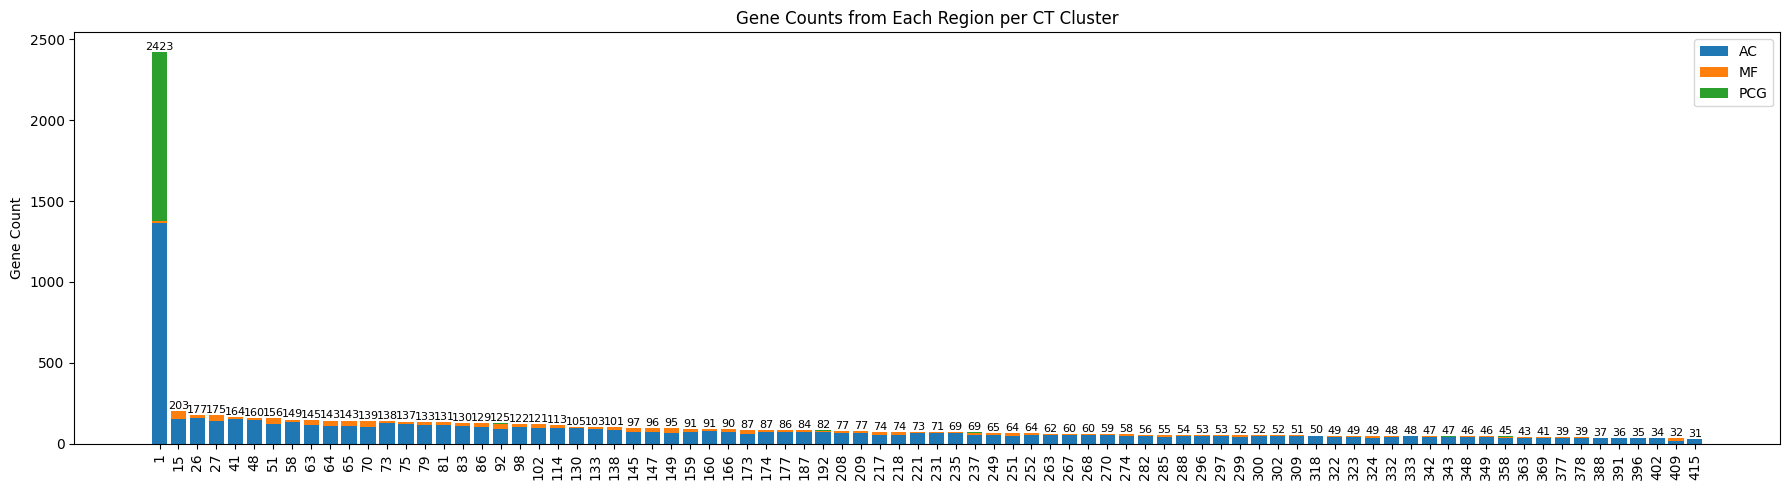

In [18]:

cluster_details_full = pd.read_csv(
    "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv",
    sep="\t"
)

cluster_details_full_ct = cluster_details_full[cluster_details_full['Cluster Type'] == 'CT']
clusters = cluster_details_full_ct[["Cluster ID", "AC", "MF", "PCG"]].copy()

for c in ["AC", "MF", "PCG"]:
    clusters.loc[:, c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0).astype(int)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]].copy()

fig, ax = plt.subplots(figsize=(18, 5))
x = np.arange(len(clusters))
bar_ac = ax.bar(x, counts["AC"], label="AC")
bar_mf = ax.bar(x, counts["MF"], bottom=counts["AC"], label="MF")
bar_pcg = ax.bar(x, counts["PCG"], bottom=counts["AC"] + counts["MF"], label="PCG")
totals = counts.sum(axis=1).values
for xi, total in zip(x, totals):
    ax.text(xi, total + 0.5, str(int(total)), ha="center", va="bottom", fontsize=8)
ax.set_xticks(x)
ax.set_xticklabels(clusters["Cluster ID"].astype(str).tolist(), rotation=90)
ax.set_ylabel("Gene Count")
ax.set_title("Gene Counts from Each Region per CT Cluster")
ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig("rosmap_gene_counts.png", dpi=220, bbox_inches="tight")
plt.show()

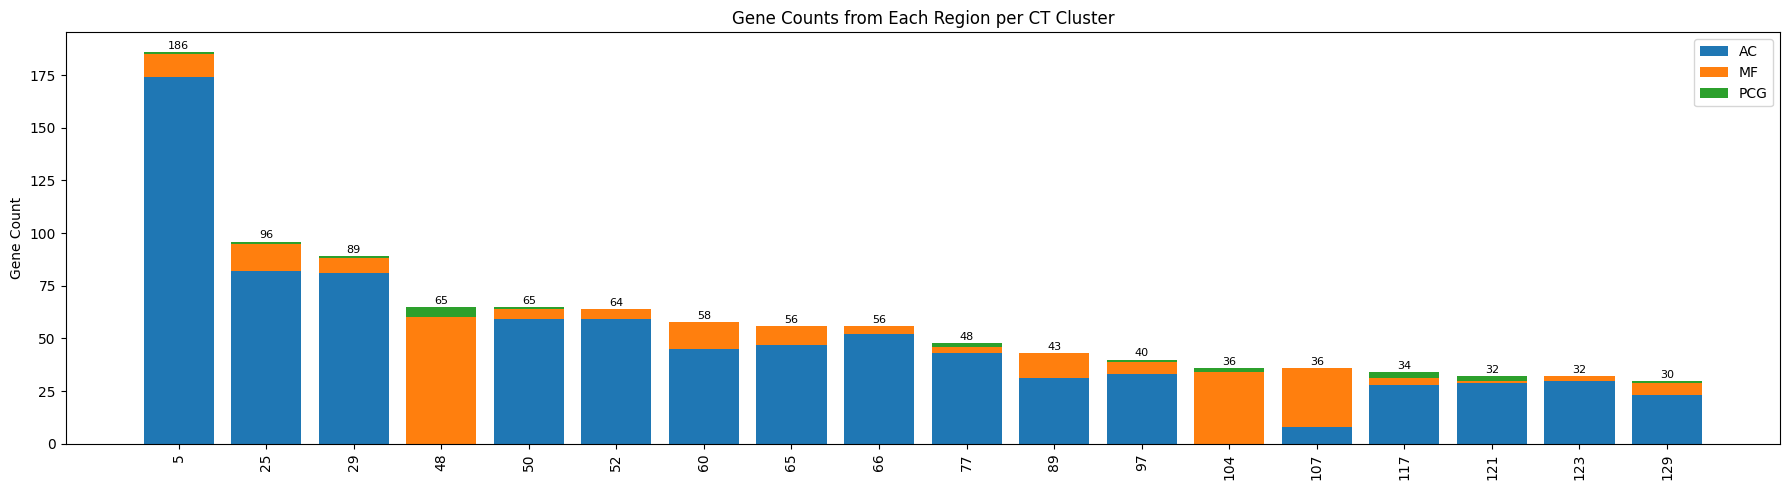

In [19]:

cluster_details_5000 = pd.read_csv(
    "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv",
    sep="\t"
)

cluster_details_5000_ct = cluster_details_5000[cluster_details_5000['Cluster Type'] == 'CT']
clusters = cluster_details_5000_ct[["Cluster ID", "AC", "MF", "PCG"]].copy()

for c in ["AC", "MF", "PCG"]:
    clusters.loc[:, c] = pd.to_numeric(clusters[c], errors='coerce').fillna(0).astype(int)

clusters = clusters.sort_values(by="Cluster ID").reset_index(drop=True)

counts = clusters[["AC", "MF", "PCG"]].copy()

fig, ax = plt.subplots(figsize=(18, 5))
x = np.arange(len(clusters))
bar_ac = ax.bar(x, counts["AC"], label="AC")
bar_mf = ax.bar(x, counts["MF"], bottom=counts["AC"], label="MF")
bar_pcg = ax.bar(x, counts["PCG"], bottom=counts["AC"] + counts["MF"], label="PCG")
totals = counts.sum(axis=1).values
for xi, total in zip(x, totals):
    ax.text(xi, total + 0.5, str(int(total)), ha="center", va="bottom", fontsize=8)
ax.set_xticks(x)
ax.set_xticklabels(clusters["Cluster ID"].astype(str).tolist(), rotation=90)
ax.set_ylabel("Gene Count")
ax.set_title("Gene Counts from Each Region per CT Cluster")
ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig("rosmap_gene_counts_top5000.png", dpi=220, bbox_inches="tight")
plt.show()

GO Visualizations

In [25]:
GO_PMAT_TSV_FULL  = f"/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_full.tsv"   
GO_PMAT_TSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_5000.tsv"

GO_BP_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_full.csv"
GO_BP_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_5000.csv"
GO_CC_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_full.csv"
GO_CC_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_5000.csv"
GO_MF_CSV_FULL = f"/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_full.csv"
GO_MF_CSV_TOP5000 = f"/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_5000.csv"
CAP = 10.0


In [13]:
def build_go_id_to_name(bp_csv=GO_BP_CSV_FULL, cc_csv=GO_CC_CSV_FULL, mf_csv=GO_MF_CSV_FULL):
    def _read(path):
        try:
            df = pd.read_csv(path, engine="python", on_bad_lines="skip")
        except Exception:
            df = pd.read_csv(path)
        id_col = None; name_col = None
        for c in df.columns:
            low = c.strip().lower()
            if low in {"termid", "id", "go_id", "goid"}:
                id_col = c
            if low in {"termname", "description", "name"}:
                name_col = c
        if id_col is None and "termID" in df.columns: id_col = "termID"
        if name_col is None and "termName" in df.columns: name_col = "termName"
        if id_col and name_col:
            return df[[id_col, name_col]].dropna().drop_duplicates().rename(columns={id_col:"GO", name_col:"Term"})
        return pd.DataFrame(columns=["GO","Term"])
    maps = pd.concat([_read(bp_csv), _read(cc_csv), _read(mf_csv)], ignore_index=True).drop_duplicates()
    return dict(zip(maps["GO"], maps["Term"]))

go_name = build_go_id_to_name()


In [ ]:
# קריאה
pmat = pd.read_csv(GO_PMAT_TSV_FULL, sep="\t")
pmat_ct = pmat[pmat.index.isin(cluster_details_full_ct["Cluster ID"])]

# אם אין עמודת 'module' מפורשת—ה-index כבר המודולים:
if "module" in pmat_ct.columns:
    pmat_ct = pmat_ct.set_index("module")

pmat_ct = pmat_ct.sort_index()
pmat_ct = pmat_ct.apply(pd.to_numeric, errors="coerce")  # לוודא נומרי

N_PER_MODULE = 4    
MAX_TERMS    = 60  
P_THRESH     = 0.05  

candidate = set()
for mod, row in pmat_ct.iterrows():
    sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
    if sig.empty:
        sig = row.nsmallest(N_PER_MODULE)
    candidate.update(sig.index.tolist())

terms = list(candidate)
if len(terms) > MAX_TERMS:
    keep = pmat_ct[terms].min(axis=0).nsmallest(MAX_TERMS).index.tolist()
    terms = keep

sub_p = pmat_ct[terms].copy()                          
sub_p = sub_p.replace(1, np.nan)
sub_p = sub_p.replace(0, np.nextafter(0, 1))
neglog = -np.log10(sub_p)

mat = neglog.T.copy()
peak_mod = mat.idxmax(axis=1)
peak_val = mat.max(axis=1)
mat["__peak_mod__"] = peak_mod
mat["__peak_val__"] = peak_val
mat = mat.sort_values(by=["__peak_mod__", "__peak_val__"], ascending=[True, False]).drop(columns=["__peak_mod__", "__peak_val__"])

def pretty_label(go_id: str, max_len=80):
    name = go_name.get(go_id, "")
    label = f"{go_id} — {name}"
    return label if len(label) <= max_len else label[:max_len-1] + "…"

row_labels = [pretty_label(go) for go in mat.index]

mat.to_csv("go_enrichment_selected_matrix_full.csv")


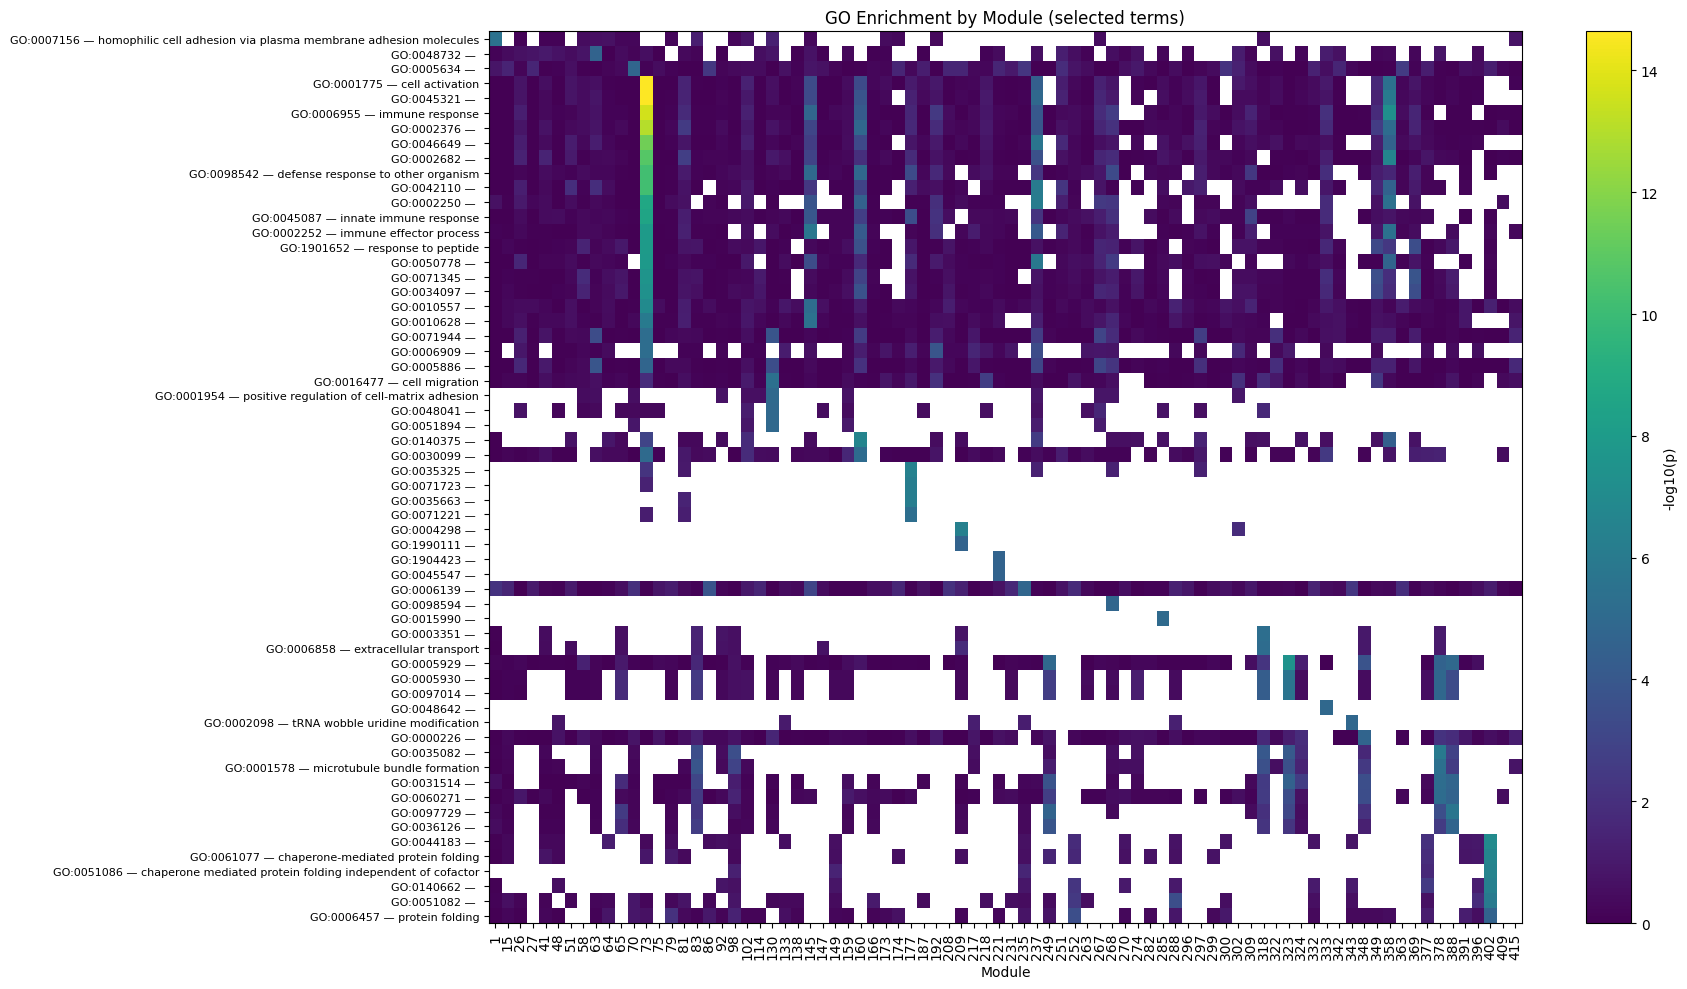

In [ ]:
cmap = plt.cm.viridis.copy()
cmap.set_bad(color="white")

fig, ax = plt.subplots(figsize=(18, 10))
im = ax.imshow(mat.values, aspect="auto", interpolation="nearest", cmap=cmap)
cbar = fig.colorbar(im, ax=ax, label="-log10(p)")
ax.set_yticks(range(len(row_labels)))
ax.set_yticklabels(row_labels, fontsize=8)
ax.set_xticks(range(mat.shape[1]))
ax.set_xticklabels(mat.columns.astype(str), rotation=90)
ax.set_xlabel("Module")
ax.set_title("GO Enrichment by Module (selected terms)")
fig.tight_layout()
fig.savefig("go_enrichment_heatmap_full.png", dpi=220, bbox_inches="tight")
plt.show()


In [ ]:
p_for_hover = sub_p.T.loc[mat.index, mat.columns] 

hover_text = []
for i, term in enumerate(mat.index):
    row = []
    for j, mod in enumerate(mat.columns):
        val = mat.iloc[i, j]
        p   = p_for_hover.iloc[i, j]
        if pd.isna(val):
            row.append(f"Term: {pretty_label(term)}<br>Module: {mod}<br>p = 1.0 (no enrichment)")
        else:
            row.append(f"Term: {pretty_label(term)}<br>Module: {mod}<br>-log10(p) = {val:.2f}<br>p ≈ {10**(-val):.2e}")
    hover_text.append(row)

fig = go.Figure(data=go.Heatmap(
    z=mat.values,
    x=[str(c) for c in mat.columns],
    y=row_labels,
    text=hover_text,
    hoverinfo="text",
    coloraxis="coloraxis",
))
fig.update_layout(
    title="GO Enrichment by Module (selected terms)",
    xaxis_title="Module",
    yaxis_title="GO term",
    coloraxis=dict(colorbar=dict(title="-log10(p)")),
    height=700
)
fig.show()


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = "."

GO_PMAT_TSV = f"{DATA_DIR}/go_pmat_rosmap_full.tsv"
GO_BP_CSV   = f"{DATA_DIR}/go_bp_tab_rosmap_full.csv"
GO_CC_CSV   = f"{DATA_DIR}/go_cc_tab_rosmap_full.csv"
GO_MF_CSV   = f"{DATA_DIR}/go_mf_tab_rosmap_full.csv"

KEGG_LONG_CSV = f"{DATA_DIR}/kegg_rosmap_full.csv"

MODULES_DETAILS = f"/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv"
OUT_DIR = Path(DATA_DIR) / "plots_signed_heatmaps"
OUT_DIR.mkdir(parents=True, exist_ok=True)

def read_csv_any(path, sep=None):
    try:
        if sep is not None:
            return pd.read_csv(path, sep=sep)
        return pd.read_csv(path)
    except Exception:
        try:
            return pd.read_csv(path, engine="python", on_bad_lines="skip")
        except Exception as e:
            raise e

def plot_signed_heatmap(mat_signed_T, title, out_png, cap=10.0, ylabels=None):
    """
    mat_signed_T: DataFrame (rows=terms, cols=modules) של signed -log10(p) אחרי מיון.
    """
    fig, ax = plt.subplots(figsize=(18, 10))
    im = ax.imshow(mat_signed_T.values, aspect="auto", interpolation="nearest",
                   vmin=-cap, vmax=cap)  
    cbar = fig.colorbar(im, ax=ax, label="signed −log10(p)  (under ⟵ 0 ⟶ over)")
    ax.set_yticks(range(mat_signed_T.shape[0]))
    ax.set_yticklabels(ylabels if ylabels is not None else mat_signed_T.index.tolist(), fontsize=8)
    ax.set_xticks(range(mat_signed_T.shape[1]))
    ax.set_xticklabels(mat_signed_T.columns.astype(str), rotation=90)
    ax.set_xlabel("Module")
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(out_png, dpi=220, bbox_inches="tight")
    plt.show()
    return fig


In [ ]:
def _read_go_long_table(path):
    df = read_csv_any(path, sep=None)
    cols = {c.lower(): c for c in df.columns}
    get = lambda *cand: next((cols[c] for c in cand if c in cols), None)
    return df.rename(columns={ 
        get("module","cluster","cluster id","cluster_id"): "module",
        get("nmodgenesinterm","overlap","k.in.term","k_term"): "x",
        get("modsize","k","module_size"): "k",
        get("bkgrtermsize","m","term_size"): "m",
        get("bkgrmodsize","n","background_size","bgsize"): "N",
        get("fracofbkgrtermsize"): "m_over_N",
        get("fracofbkgrmodsize"): "k_over_N",
        get("termid","id","go_id","goid"): "termID",
        get("termname","description","name"): "termName"
    })

def _concat_go_longs(bp_csv, cc_csv, mf_csv):
    frames = []
    for p in [bp_csv, cc_csv, mf_csv]:
        try:
            frames.append(_read_go_long_table(p))
        except Exception:
            pass
    long = pd.concat(frames, ignore_index=True).dropna(subset=["module","termID"])
    long["module"] = pd.to_numeric(long["module"], errors="coerce")
    for c in ["x","k","m","N","m_over_N","k_over_N"]:
        if c in long.columns:
            long[c] = pd.to_numeric(long[c], errors="coerce")
    long = long.dropna(subset=["module"])
    long["termID"] = long["termID"].astype(str)
    return long

def _go_direction_map(long_df):
    if "N" not in long_df.columns or long_df["N"].isna().all():
        N_est1 = np.where(long_df["m"].notna() & long_df["m_over_N"].notna() & (long_df["m_over_N"]>0),
                          long_df["m"]/long_df["m_over_N"], np.nan)
        N_est2 = np.where(long_df["k"].notna() & long_df["k_over_N"].notna() & (long_df["k_over_N"]>0),
                          long_df["k"]/long_df["k_over_N"], np.nan)
        long_df = long_df.copy()
        long_df["N_est"] = pd.Series(N_est1).fillna(pd.Series(N_est2))
        N_vec = long_df["N_est"]
    else:
        N_vec = long_df["N"]

    obs_prop = (long_df["x"] / long_df["k"]).astype(float)
    bg_prop  = (long_df["m"] / N_vec).astype(float)
    sign = np.sign(obs_prop - bg_prop)
    dir_map = {(int(mod), term): s for mod, term, s in zip(long_df["module"], long_df["termID"], sign)
               if pd.notna(mod) and pd.notna(s)}
    return dir_map

def _go_id_to_name_map(bp_csv, cc_csv, mf_csv):
    frames = []
    for path in [bp_csv, cc_csv, mf_csv]:
        try:
            df = read_csv_any(path, sep=None)
        except Exception:
            continue
        cols = {c.lower(): c for c in df.columns}
        id_col  = next((cols[c] for c in ["termid","id","go_id","goid"] if c in cols), None)
        name_col= next((cols[c] for c in ["termname","description","name"] if c in cols), None)
        if id_col and name_col:
            frames.append(df[[id_col, name_col]].rename(columns={id_col:"GO", name_col:"Term"}))
    if not frames:
        return {}
    mapping = pd.concat(frames, ignore_index=True).dropna().drop_duplicates()
    return dict(zip(mapping["GO"].astype(str), mapping["Term"].astype(str)))

def build_go_signed_matrix(
    go_pmat_tsv=GO_PMAT_TSV,
    go_bp_csv=GO_BP_CSV, go_cc_csv=GO_CC_CSV, go_mf_csv=GO_MF_CSV, modules_details=MODULES_DETAILS,
    cap=10.0, selection="global_top", K_GLOBAL=60, N_PER_MODULE=4, P_THRESH=0.05, clean_TS=True
):
    pmat = read_csv_any(go_pmat_tsv, sep="\t")
    if clean_TS:
        mod_details = read_csv_any(modules_details, sep="\t")
        print(mod_details.columns)
        pmat = pmat[pmat.index.isin(mod_details[mod_details["Cluster Type"] == "CT"]["Cluster ID"])]
    if "module" in pmat.columns:
        pmat = pmat.set_index("module")
    pmat.index = pd.to_numeric(pmat.index, errors="coerce")
    pmat = pmat.sort_index()
    pmat = pmat.apply(pd.to_numeric, errors="coerce")
    pmat.columns = pmat.columns.astype(str)

    long_df = _concat_go_longs(go_bp_csv, go_cc_csv, go_mf_csv)
    dir_map = _go_direction_map(long_df)
    if selection == "global_top":
        terms = pmat.min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    elif selection == "per_module":
        terms = set()
        for mod, row in pmat.iterrows():
            sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty:
                sig = row.nsmallest(N_PER_MODULE)
            terms.update(sig.index.tolist())
        terms = list(terms)
        if len(terms) > K_GLOBAL:
            terms = pmat[terms].min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    else:
        raise ValueError("selection must be 'global_top' or 'per_module'.")

    sub = pmat[terms].copy()

    EPS = np.nextafter(0, 1)
    signed = sub.copy()
    for c in signed.columns:
        p = signed[c].astype(float)
        v = -np.log10(np.clip(p, EPS, 1.0))
        v = np.minimum(v, cap)
        s = [dir_map.get((int(mod), str(c)), 0.0) for mod in signed.index]
        signed[c] = v * np.array(s)

    mat_T = signed.T
    peak_mod = mat_T.idxmax(axis=1)
    peak_val = mat_T.max(axis=1)
    mat_T["__peak_mod__"] = peak_mod
    mat_T["__peak_val__"] = peak_val
    mat_T = mat_T.sort_values(by=["__peak_mod__", "__peak_val__"], ascending=[True, False])
    mat_T = mat_T.drop(columns=["__peak_mod__", "__peak_val__"])

    id2name = _go_id_to_name_map(go_bp_csv, go_cc_csv, go_mf_csv)
    ylabels = [f"{go} — {id2name.get(go, '')}".strip(" —") for go in mat_T.index]

    return mat_T, ylabels


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib.patheffects as pe

def build_go_logp_matrix(
    go_pmat_tsv,               
    go_terms_csv=None,           
    modules_details=None,        
    clean_TS=True,
    cap=6.0,                    
    selection="global_top",  
    K_GLOBAL=60,             
    N_PER_MODULE=4,              
    P_THRESH=0.05,               
    alpha_levels=((1e-3,"***"), (1e-2,"**"), (5e-2,"*")),  
):
    pmat = pd.read_csv(go_pmat_tsv, sep="\t")
    if "module" in pmat.columns:
        pmat = pmat.set_index("module")
    pmat.index = pd.to_numeric(pmat.index, errors="coerce")
    pmat = pmat.sort_index().apply(pd.to_numeric, errors="coerce")
    pmat.columns = pmat.columns.astype(str).str.strip().str.upper()

    if clean_TS and modules_details is not None:
        md = pd.read_csv(modules_details, sep="\t")
        ct_ids = md.loc[md["Cluster Type"].eq("CT"), "Cluster ID"].astype(int).tolist()
        pmat = pmat[pmat.index.astype(int).isin(ct_ids)]

    import re

    def _norm_id(x):
        return str(x).strip().upper()

    def _detect_go_cols(df):
        cols = {c.lower(): c for c in df.columns}

        id_keys   = ["termid","id","go_id","goid","go.id","go"] 
        name_keys = ["termname","description","name","term", "bkgrTermSize"]

        id_col = next((cols[k] for k in id_keys if k in cols), None)
        name_col = next((cols[k] for k in name_keys if k in cols), None)

        if id_col is None:
            obj_cols = [c for c in df.columns if df[c].dtype == 'object']
            best, best_frac = None, 0.0
            for c in obj_cols:
                s = df[c].astype(str).str.strip()
                frac = s.str.match(r"^GO:\d{4,9}$", na=False).mean()
                if frac > best_frac:
                    best, best_frac = c, frac
            if best_frac >= 0.3: 
                id_col = best

        if name_col is None:
            cand = []
            for c in df.columns:
                if c == id_col: 
                    continue
                s = df[c].astype(str)
                if s.str.match(r"^GO:\d{4,9}$", na=False).mean() > 0.2:
                    continue
                avg_len = s.str.len().mean()
                nan_frac = s.isna().mean()
                cand.append((avg_len - 20*nan_frac, c))
            if cand:
                name_col = max(cand)[1]

        return id_col, name_col
    id2name = {}
    if go_terms_csv is not None:
        terms = pd.read_csv(go_terms_csv, engine="python", on_bad_lines="skip")
        id_col, name_col = _detect_go_cols(terms)

        if id_col is not None:
            terms[id_col] = terms[id_col].map(_norm_id)

            keep_ids  = set(terms[id_col].dropna().unique())
            keep_cols = [c for c in pmat.columns if _norm_id(c) in keep_ids]
            if len(keep_cols) > 0:
                pmat = pmat[keep_cols]

            if name_col is not None:
                id2name = (terms[[id_col, name_col]]
                        .dropna()
                        .drop_duplicates(id_col)
                        .assign(**{id_col: lambda d: d[id_col].map(_norm_id),
                                    name_col: lambda d: d[name_col].astype(str).str.strip()})
                        .set_index(id_col)[name_col]
                        .to_dict())

    pmat.columns = [ _norm_id(c) for c in pmat.columns ]

    if selection == "global_top":
        chosen = pmat.min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    elif selection == "per_module":
        chosen_set = set()
        for _, row in pmat.iterrows():
            sig = row[row < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty:
                sig = row.nsmallest(N_PER_MODULE)
            chosen_set.update(sig.index.tolist())
        chosen = list(chosen_set)
        if len(chosen) > K_GLOBAL:
            chosen = pmat[chosen].min(axis=0).nsmallest(K_GLOBAL).index.tolist()
    else:
        raise ValueError("selection must be 'global_top' או 'per_module'.")

    psub = pmat[chosen].copy()    

    EPS = np.nextafter(0, 1)
    logp_T = (-np.log10(np.clip(psub, EPS, 1.0))).T 
    logp_T = logp_T.clip(lower=0, upper=cap)

    def pretty(go):
        name = id2name.get(go, "")
        return f"{go} — {name}" if name else go
    logp_T.index = [pretty(go) for go in logp_T.index]

    max_val = logp_T.max(axis=1)
    peak_mod = logp_T.idxmax(axis=1)
    logp_T["__peak_mod__"] = peak_mod
    logp_T["__max__"] = max_val
    logp_T = logp_T.sort_values(by=["__peak_mod__", "__max__"], ascending=[True, False]) \
                   .drop(columns=["__peak_mod__", "__max__"])

    measure_df = psub.T.copy()
    measure_df.index = [pretty(go) for go in measure_df.index]
    measure_df = measure_df.reindex(index=logp_T.index, columns=logp_T.columns)

    def _stars(p):
        if not np.isfinite(p): return ""
        for thr, sym in alpha_levels:
            if p <= thr: return sym
        return ""
    stars_df = measure_df.applymap(_stars)

    return logp_T, measure_df, stars_df 


def plot_log_heatmap_with_stars(logp_df, stars_df=None, cap=6.0, title="GO −log10(p)"):
    fig, ax = plt.subplots(figsize=(18, 10))
    im = ax.imshow(logp_df.values, aspect="auto", vmin=0.0, vmax=cap) 
    fig.colorbar(im, ax=ax, label=f"−log10(p) (0..{cap})")

    ax.set_yticks(range(logp_df.shape[0])); ax.set_yticklabels(logp_df.index, fontsize=8)
    ax.set_xticks(range(logp_df.shape[1])); ax.set_xticklabels(logp_df.columns.astype(str), rotation=90)
    ax.set_xlabel("Module"); ax.set_title(title)

    if stars_df is not None:
        stars_df = stars_df.reindex(index=logp_df.index, columns=logp_df.columns)
        for i, term in enumerate(logp_df.index):
            for j, mod in enumerate(logp_df.columns):
                s = stars_df.loc[term, mod]
                if isinstance(s, str) and s:
                    ax.text(j, i, s, ha="center", va="center", fontsize=9, color="black")

    fig.tight_layout()
    return fig


/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/1264590790.py:153: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



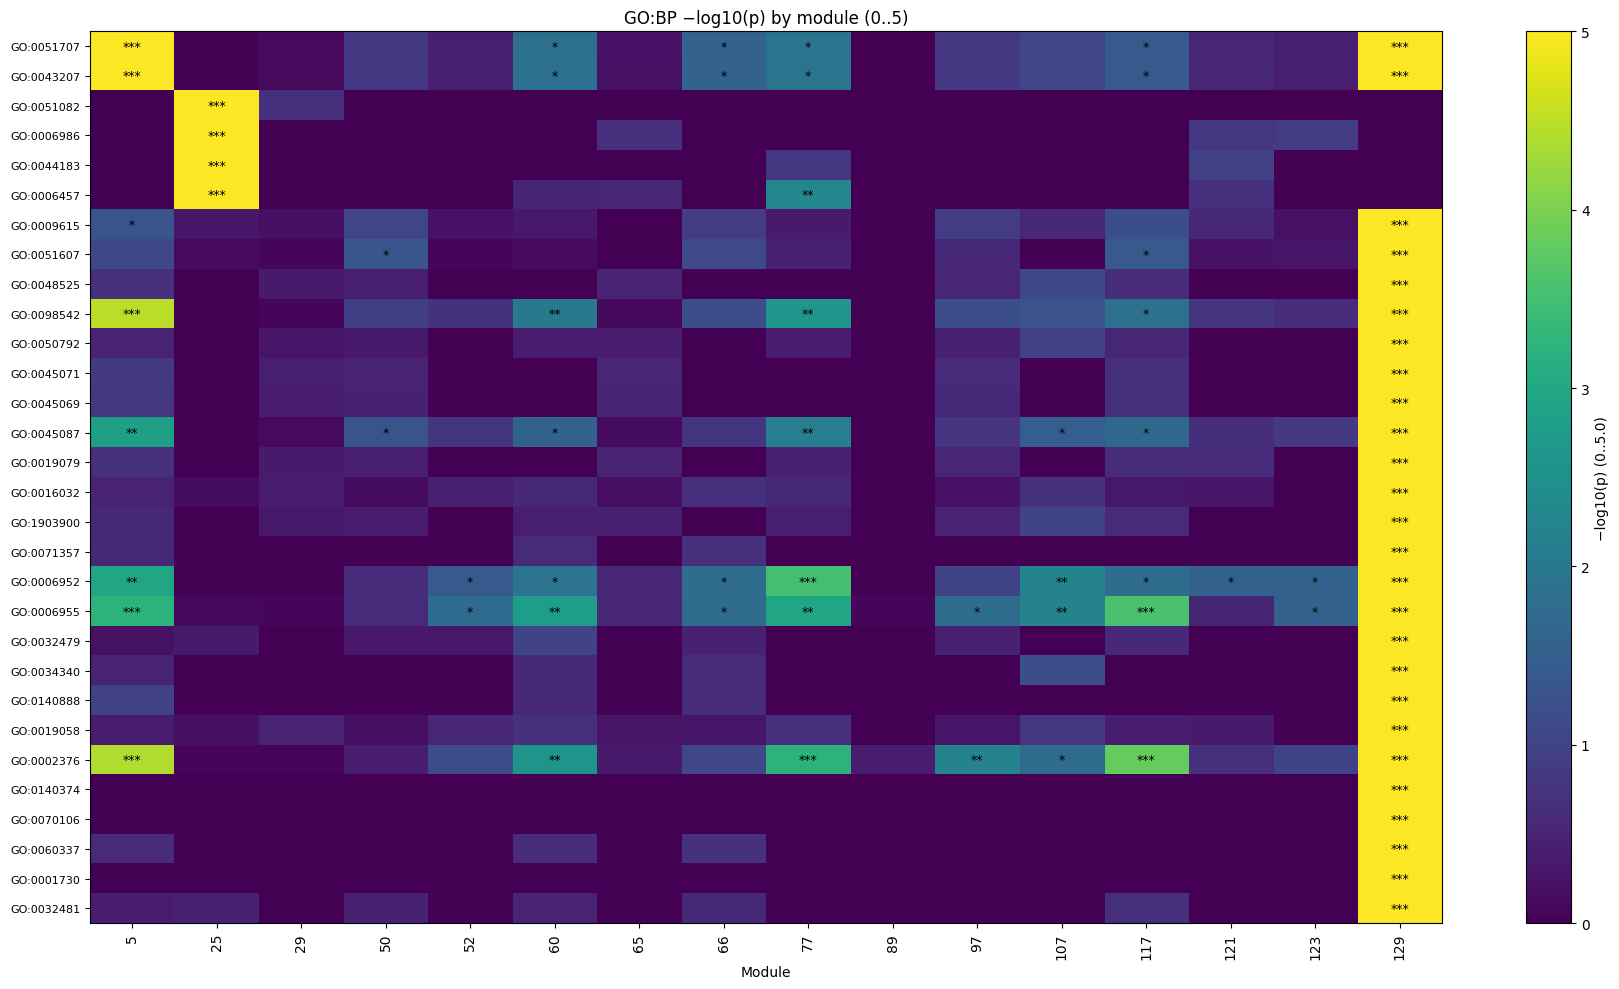

In [143]:
GO_PMAT = "/Users/edeneldar/CoExpression_ReProduction/go_pmat_rosmap_5000.tsv"
GO_BP   = "/Users/edeneldar/CoExpression_ReProduction/go_bp_tab_rosmap_5000.csv"
GO_CC   = "/Users/edeneldar/CoExpression_ReProduction/go_cc_tab_rosmap_5000.csv"
GO_MF   = "/Users/edeneldar/CoExpression_ReProduction/go_mf_tab_rosmap_5000.csv"
MODULES = "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv"
logp_df, meas_df, stars_df = build_go_logp_matrix(
    GO_PMAT, go_terms_csv=GO_BP, modules_details=MODULES,
    clean_TS=True, selection="global_top", K_GLOBAL=30, cap=5.0
)

plot_log_heatmap_with_stars(logp_df, stars_df, cap=5.0,
                            title="GO:BP −log10(p) by module (0..5)")
plt.savefig("go_signed_heatmap_5000_global_new30.png", dpi=220, bbox_inches='tight')
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def build_kegg_logp_matrix(
    kegg_long_csv,           
    modules_details=None,   
    clean_TS=True,
    cap=6.0,                 
    selection="global_top", 
    K_GLOBAL=60,             
    N_PER_MODULE=4,             
    P_THRESH=0.05,              
    star_from="p",              
    alpha_levels=((1e-3,"***"), (1e-2,"**"), (5e-2,"*"))  
):
    df = pd.read_csv(kegg_long_csv, engine="python", on_bad_lines="skip")
    assert "Cluster" in df.columns and "Description" in df.columns, "Missing Cluster/Description"

    df["Cluster"] = pd.to_numeric(df["Cluster"], errors="coerce").astype("Int64")
    df = df.dropna(subset=["Cluster"])
    df["Cluster"] = df["Cluster"].astype(int)
    df["Description"] = df["Description"].astype(str).str.strip()
    if "ID" in df.columns:
        df["ID"] = df["ID"].astype(str).str.strip()

    df["p"]      = pd.to_numeric(df.get("pvalue"),   errors="coerce")
    df["padj"]   = pd.to_numeric(df.get("p.adjust"), errors="coerce")
    df["qvalue"] = pd.to_numeric(df.get("qvalue"),   errors="coerce")

    if clean_TS and modules_details is not None:
        md = pd.read_csv(modules_details, sep="\t")
        ct_ids = md.loc[md["Cluster Type"].eq("CT"), "Cluster ID"].astype(int).tolist()
        df = df[df["Cluster"].isin(ct_ids)]

    agg = (df.groupby(["Description","Cluster"], as_index=False)
             .agg(p=("p","min"), padj=("padj","min"), qvalue=("qvalue","min")))
    pmat = agg.pivot(index="Description", columns="Cluster", values="p").astype(float)

    if selection == "global_top":
        chosen_terms = pmat.min(axis=1).nsmallest(K_GLOBAL).index.tolist()
    elif selection == "per_module":
        chosen = set()
        for c in pmat.columns:
            col = pmat[c]
            sig = col[col < P_THRESH].nsmallest(N_PER_MODULE)
            if sig.empty: sig = col.nsmallest(N_PER_MODULE)
            chosen.update(sig.index.tolist())
        chosen_terms = list(chosen)
        if len(chosen_terms) > K_GLOBAL:
            chosen_terms = pmat.loc[chosen_terms].min(axis=1).nsmallest(K_GLOBAL).index.tolist()
    else:
        raise ValueError("selection must be 'global_top' או 'per_module'.")

    psub = pmat.loc[chosen_terms] 

    EPS = np.nextafter(0, 1)
    logp_df = -np.log10(np.clip(psub, EPS, 1.0))
    logp_df = logp_df.clip(lower=0, upper=cap)

    if "ID" in df.columns:
        idmap = (df[["Description","ID"]].dropna().drop_duplicates()
                   .groupby("Description")["ID"].first())
        new_index = [f"{idmap.get(desc, '')} — {desc}".strip(" —") for desc in logp_df.index]
        logp_df.index = new_index

    if star_from == "padj":
        measure_mat = agg.pivot(index="Description", columns="Cluster", values="padj").astype(float)
    elif star_from in {"qvalue","q"}:
        measure_mat = agg.pivot(index="Description", columns="Cluster", values="qvalue").astype(float)
    else:
        measure_mat = pmat  

    measure_df = measure_mat.loc[psub.index, psub.columns]
    if "ID" in df.columns:
        measure_df.index = logp_df.index  

    def _stars(p):
        if not np.isfinite(p): return ""
        for thr, sym in alpha_levels:
            if p <= thr: return sym
        return ""
    stars_df = measure_df.applymap(_stars)

    max_val = logp_df.max(axis=1)
    peak_mod = logp_df.idxmax(axis=1)
    logp_df["__peak_mod__"] = peak_mod
    logp_df["__max__"] = max_val
    logp_df = logp_df.sort_values(by=["__peak_mod__", "__max__"], ascending=[True, False]) \
                     .drop(columns=["__peak_mod__", "__max__"])

    measure_df = measure_df.loc[logp_df.index, logp_df.columns]
    stars_df   = stars_df.loc[logp_df.index, logp_df.columns]

    return logp_df, measure_df, stars_df 


def plot_log_heatmap_with_stars(logp_df, stars_df=None, cap=6.0, title="KEGG −log10(p)"):
    fig, ax = plt.subplots(figsize=(18, 10))
    im = ax.imshow(logp_df.values, aspect="auto", vmin=0.0, vmax=cap)
    fig.colorbar(im, ax=ax, label=f"−log10(p) (0..{cap})")
    ax.set_yticks(range(logp_df.shape[0])); ax.set_yticklabels(logp_df.index, fontsize=8)
    ax.set_xticks(range(logp_df.shape[1])); ax.set_xticklabels(logp_df.columns.astype(str), rotation=90)
    ax.set_xlabel("Module"); ax.set_title(title)

    if stars_df is not None:
        stars_df = stars_df.reindex(index=logp_df.index, columns=logp_df.columns)
        for i, term in enumerate(logp_df.index):
            for j, mod in enumerate(logp_df.columns):
                s = stars_df.loc[term, mod]
                if isinstance(s, str) and s:
                    ax.text(j, i, s, ha="center", va="center", fontsize=9, color="black")

    fig.tight_layout()
    return fig


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import to_rgb

# ---- עזר: זיהוי עמודות KEGG + נרמול שמות ----
def _std_cols(df):
    low = {c.lower(): c for c in df.columns}
    def pick(*keys):
        for k in keys:
            if k in low: return low[k]
        return None
    c_cluster    = pick("cluster")
    c_desc       = pick("description","pathway","term","name")
    c_id         = pick("id")
    c_category   = pick("category","catagory")           # תומך בטעות כתיב
    c_subcat     = pick("subcategory","subcatagory","sub_category","sub-cat")
    return {"Cluster":c_cluster,"Description":c_desc,"ID":c_id,
            "category":c_category,"subcategory":c_subcat}

def _extract_row_meta_from_kegg(kegg_long_csv, row_labels):
    """
    row_labels הם שמות השורות בהיטמאפ (יכולים להיות "ID — Description" או רק Description).
    מחזיר DataFrame עם אינדקס = row_labels ועמודות ['category','subcategory'] (ייתכנו NaN אם חסר).
    """
    df = pd.read_csv(kegg_long_csv, engine="python", on_bad_lines="skip")
    cols = _std_cols(df)
    # אם חסרות עמודות בסיס - נחזיר מסגרת ריקה (נעבור 'בשקט')
    if cols["Description"] is None:
        return pd.DataFrame(index=row_labels, columns=["category","subcategory"])
    desc_col = cols["Description"]
    id_col   = cols["ID"]
    cat_col  = cols["category"]
    sub_col  = cols["subcategory"]

    # טבלת מיפוי ייחודית Description -> category/subcategory (הראשון המופיע)
    meta = (df.dropna(subset=[desc_col])
              .drop_duplicates([desc_col])
              .rename(columns={
                  desc_col:"Description",
                  cat_col:"category" if cat_col else "category",
                  sub_col:"subcategory" if sub_col else "subcategory"
              })[["Description","category","subcategory"]])

    # חילוץ ה-Description מהתווית ("ID — Description" או רק Description)
    def parse_desc(lbl):
        # מפריד לפי מקף ארוך/קצר אם יש
        if "—" in lbl:
            return lbl.split("—", 1)[-1].strip()
        if " - " in lbl:
            return lbl.split(" - ", 1)[-1].strip()
        return lbl.strip()

    desc_series = pd.Series([parse_desc(x) for x in row_labels], index=row_labels, name="Description")
    row_meta = desc_series.to_frame().merge(meta, on="Description", how="left").set_index(desc_series.index)
    return row_meta[["category","subcategory"]]

def _palette(labels, base_colors=None):
    """
    בונה מילון label->color. אם base_colors=None, נשתמש בפלטה טובה מרובת קטגוריות.
    """
    uniq = [x for x in pd.unique(pd.Series(labels)) if pd.notna(x)]
    if not uniq:
        return {}
    if base_colors is None:
        base_colors = (
            list(plt.cm.tab20.colors) +
            list(plt.cm.tab20b.colors) +
            list(plt.cm.tab20c.colors) +
            list(plt.cm.Set3.colors)
        )
    # השמה דטרמיניסטית: לפי סדר הופעה
    color_map = {lab: base_colors[i % len(base_colors)] for i, lab in enumerate(uniq)}
    return color_map

def plot_kegg_log_heatmap_with_annots(
    logp_df, stars_df=None, cap=6.0, title="KEGG −log10(p)",
    kegg_long_csv=None, row_meta=None, figsize=(20, 12),
    legend_fontsize=8
):
    # --- מטה לשורות ---
    if row_meta is None:
        if kegg_long_csv is not None:
            row_meta = _extract_row_meta_from_kegg(kegg_long_csv, logp_df.index.tolist())
        else:
            row_meta = pd.DataFrame(index=logp_df.index, columns=["category","subcategory"])

    # --- מיון שורות: לפי subcategory ואז category (עם שמירת סדר הופעה) ---
    rm = row_meta.copy()
    sub_order = pd.Categorical(rm["subcategory"], categories=pd.unique(rm["subcategory"].dropna()), ordered=True)
    cat_order = pd.Categorical(rm["category"],    categories=pd.unique(rm["category"].dropna()),    ordered=True)
    rm["_subo"] = sub_order
    rm["_cato"] = cat_order
    order_idx = rm.sort_values(by=["_cato","_subo"], na_position="last", kind="mergesort").index

    # יישור לפי הסדר החדש
    logp_df  = logp_df.loc[order_idx]
    if stars_df is not None:
        stars_df = stars_df.reindex(index=order_idx, columns=logp_df.columns)
    row_meta = rm.loc[order_idx, ["category","subcategory"]]

    # מפות צבע (אחרי המיון כדי שיתאימו לשורות)
    cat_map  = _palette(row_meta["category"])
    sub_map  = _palette(row_meta["subcategory"])
    cat_colors = np.array([to_rgb(cat_map.get(v, (0.9,0.9,0.9)))  for v in row_meta["category"]])
    sub_colors = np.array([to_rgb(sub_map.get(v, (0.95,0.95,0.95))) for v in row_meta["subcategory"]])

    # --- פריסה: [Heatmap | Category | Subcategory | Legend] (מקרא בימין)
    fig = plt.figure(figsize=figsize, constrained_layout=False)
    gs = fig.add_gridspec(nrows=1, ncols=4, width_ratios=[1.00, 0.055, 0.055, 0.36], wspace=0.015)

    ax_hm  = fig.add_subplot(gs[0,0])
    ax_cat = fig.add_subplot(gs[0,1])  # CATEGORY צמוד למטריצה
    ax_sub = fig.add_subplot(gs[0,2])  # SUBCATEGORY אחריו
    ax_leg = fig.add_subplot(gs[0,3]); ax_leg.axis("off")

    # --- ההיטמאפ ---
    im = ax_hm.imshow(logp_df.values, aspect="auto", vmin=0.0, vmax=cap)
    fig.colorbar(im, ax=ax_hm, fraction=0.028, pad=0.02, label=f"−log10(p) (0..{cap})")
    ax_hm.set_yticks(range(logp_df.shape[0])); ax_hm.set_yticklabels(logp_df.index, fontsize=8)
    ax_hm.set_xticks(range(logp_df.shape[1])); ax_hm.set_xticklabels(logp_df.columns.astype(str), rotation=90)
    ax_hm.set_xlabel("Module"); ax_hm.set_title(title)

    # --- פסי אנוטציה (מיושרים לגובה ההיטמאפ) ---
    ax_cat.imshow(cat_colors.reshape(-1,1,3), aspect="auto")
    ax_sub.imshow(sub_colors.reshape(-1,1,3), aspect="auto")
    for ax in (ax_cat, ax_sub):
        ax.set_ylim(ax_hm.get_ylim())
        ax.set_xticks([]); ax.set_yticks([])
        for sp in ax.spines.values():
            sp.set_visible(False)

    # --- כוכביות (אם יש) ---
    if stars_df is not None:
        for i, term in enumerate(logp_df.index):
            for j, mod in enumerate(logp_df.columns):
                s = stars_df.loc[term, mod]
                if isinstance(s, str) and s:
                    ax_hm.text(j, i, s, ha="center", va="center", fontsize=9, color="black")

    # --- מקרא בימין, בלי חפיפות ---
    from matplotlib.patches import Patch
    handles_cat = [Patch(facecolor=cat_map[k], edgecolor='none', label=str(k)) for k in cat_map.keys()]
    handles_sub = [Patch(facecolor=sub_map[k], edgecolor='none', label=str(k)) for k in sub_map.keys()]

    def place_leg(ax, handles, title, y_top):
        if not handles: return y_top
        est_h = 0.035 * (len(handles) + 2)  # הערכת גובה סבירה
        leg = ax.legend(handles=handles, title=title, loc="upper left",
                        bbox_to_anchor=(0.0, y_top), fontsize=legend_fontsize,
                        title_fontsize=legend_fontsize+1, frameon=False)
        ax.add_artist(leg)
        return max(0.02, y_top - est_h)

    y = 0.98
    y = place_leg(ax_leg, handles_cat, "Category", y)
    place_leg(ax_leg, handles_sub, "Subcategory", y)

    plt.subplots_adjust(left=0.05, right=0.98, top=0.95, bottom=0.06, wspace=0.015)
    fig.tight_layout(rect=[0.03, 0.04, 0.98, 0.96])

    return fig



/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_9341/2582672523.py:83: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  stars_df = measure_df.applymap(_stars)
/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_9341/2269814304.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.03, 0.04, 0.98, 0.96])


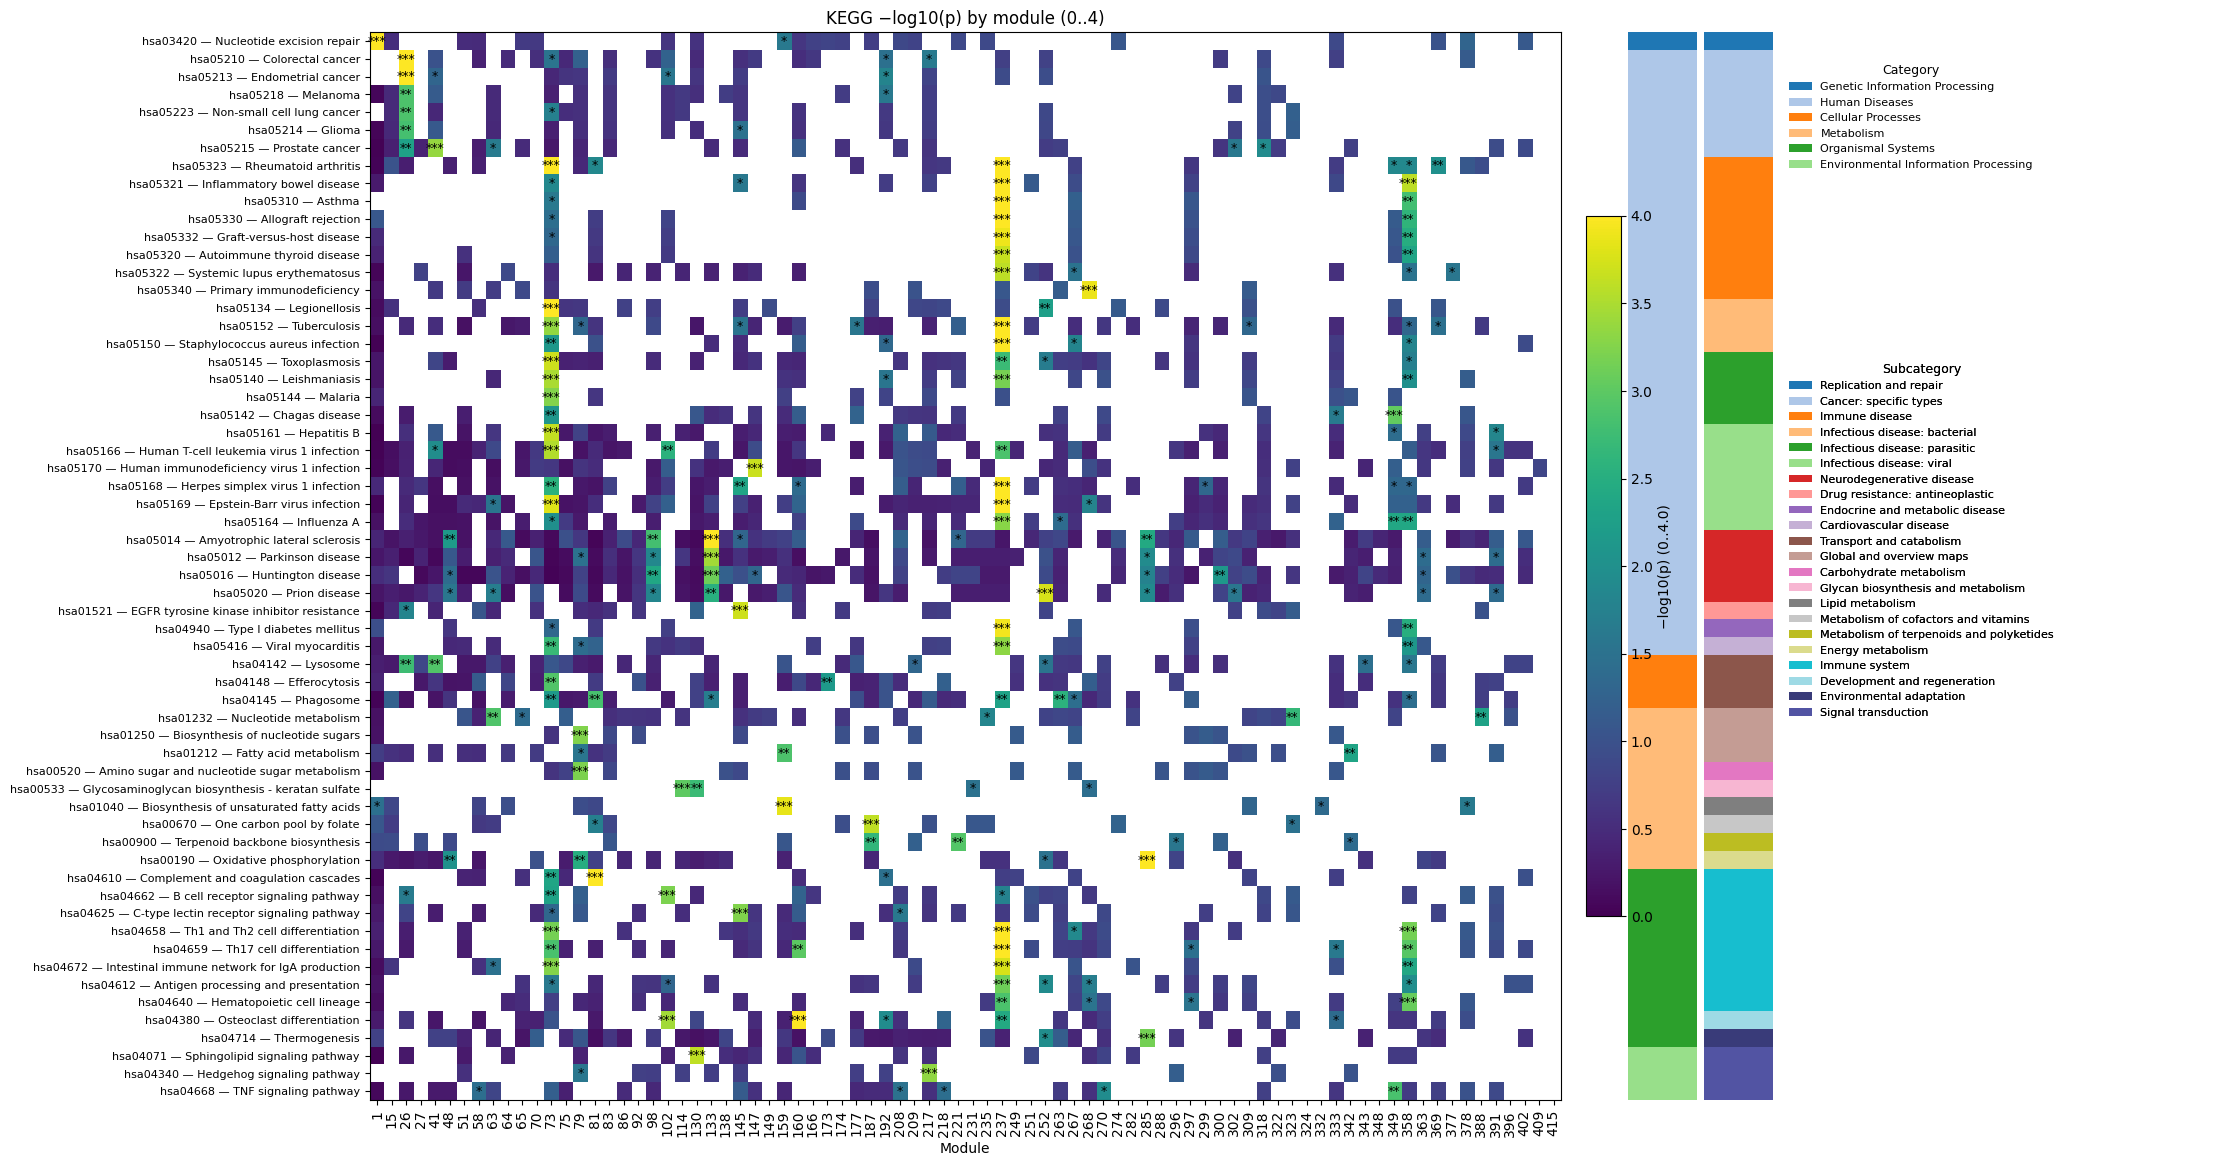

In [ ]:
KEGG_CSV = "/Users/edeneldar/CoExpression_ReProduction/kegg_rosmap_full.csv"
MODULES = "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run4_Cluster_details.tsv"
logp_kegg, meas_kegg, stars_kegg = build_kegg_logp_matrix(
    KEGG_CSV,
    modules_details=MODULES, clean_TS=True,
    selection="global_top", K_GLOBAL=60,
    cap=4.0, star_from="p"
)


fig = plot_kegg_log_heatmap_with_annots(
    logp_kegg, stars_df=stars_kegg, cap=4.0,
    title="KEGG −log10(p) by module (0..4)",
    kegg_long_csv=KEGG_CSV,           # מכאן הוא שולף category/subcategory
    legend_fontsize=8
)
plt.savefig("kegg_signed_heatmap_global60_new12.png", dpi=220, bbox_inches='tight')
plt.show()

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_8914/3953315945.py:93: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



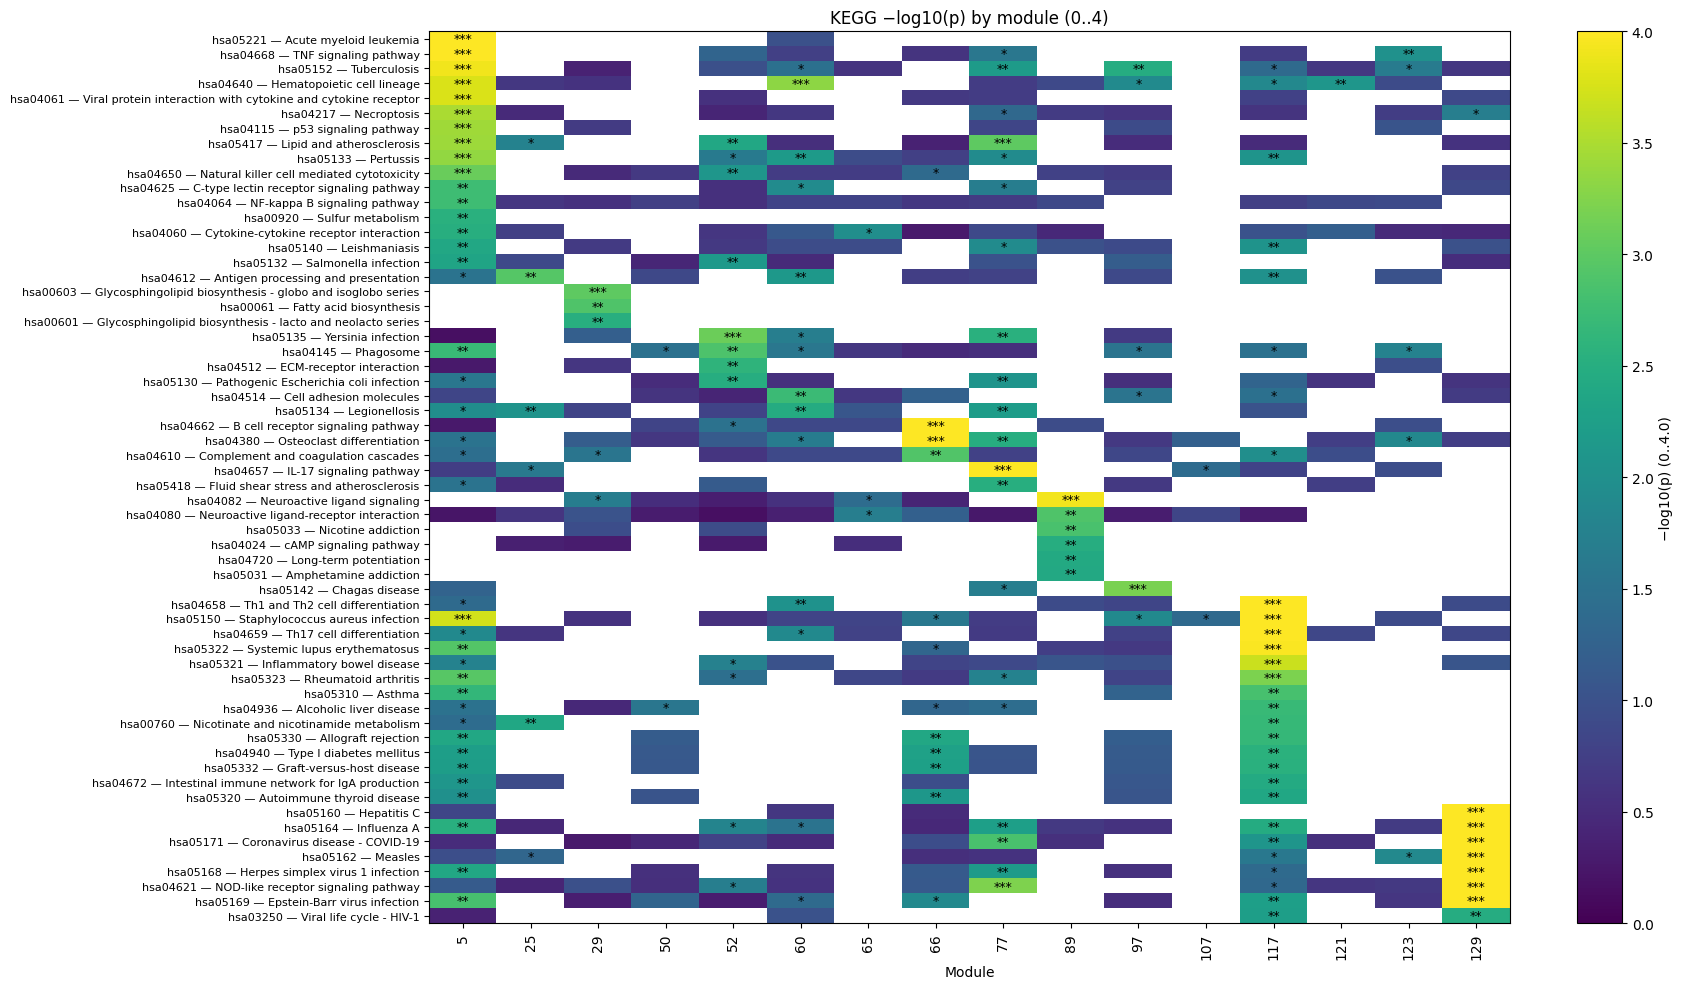

In [ ]:
KEGG_CSV = "/Users/edeneldar/CoExpression_ReProduction/kegg_rosmap_5000.csv"
MODULES_5000 = "/Users/edeneldar/Library/CloudStorage/GoogleDrive-edenede2@gmail.com/Shared drives/is-SomekhLab/inter_tissue_coexpression/proccessed_data/ROSMAP_full_outputs/xwgcna_rosmap_autobeta_run5_Cluster_details.tsv"

logp_kegg, meas_kegg, stars_kegg = build_kegg_logp_matrix(
    KEGG_CSV,
    modules_details=MODULES_5000, clean_TS=True,
    selection="global_top", K_GLOBAL=60,
    cap=4.0,                  
    star_from="p"           
)

plot_log_heatmap_with_stars(
    logp_kegg, stars_kegg, cap=4.0,
    title="KEGG −log10(p) by module (0..4)"
)

plt.savefig("kegg_signed_heatmap_5000_global_new.png")
plt.show()